In [1]:
from puzzle_solver import PuzzleSolver
from state import State, HEURISTIC
from matplotlib import pyplot as plt
from collections import defaultdict

In [2]:
goal = [[1, 2, 3], [4, 5, 6], [7, 8, State.BLANK_VALUE]]
puzzle_solver = PuzzleSolver(goal=goal,no_print=True)

In [3]:
solvable_solutions = {
  method: defaultdict(list) for method in ["h1", "h2", "beam"]
}
h1_generated, h2_generated = [], []
h1_moves, h2_moves, beam_moves = [], [], []

moves = range(5, 501, 5)
num_max_nodes = 5
max_nodes = [(10 ** (i + 2)) for i in range(num_max_nodes)]

for n in moves:
  puzzle_solver.max_nodes = None
  puzzle_solver.randomize_state(n)
  
  h1_res = puzzle_solver.solve_a_star(heuristic=HEURISTIC.H1)
  h1_generated.append(h1_res["generated"])
  h1_moves.append(h1_res["moves"])
  
  h2_res = puzzle_solver.solve_a_star(heuristic=HEURISTIC.H2)
  h2_generated.append(h2_res["generated"])
  h2_moves.append(h2_res["moves"])

  beam_res = puzzle_solver.solve_beam(5)
  beam_moves.append(beam_res["moves"])

  
  for mn in max_nodes:
    puzzle_solver.max_nodes = mn

    h1_res = puzzle_solver.solve_a_star(heuristic=HEURISTIC.H1)
    solvable_solutions["h1"][mn].append(h1_res["success"])

    h2_res = puzzle_solver.solve_a_star(heuristic=HEURISTIC.H2)
    solvable_solutions["h2"][mn].append(h2_res["success"])

    beam_res = puzzle_solver.solve_beam(5)
    solvable_solutions["beam"][mn].append(beam_res["success"])


{'h1': defaultdict(<class 'list'>, {100: 0.33, 1000: 0.44, 10000: 0.83, 100000: 1.0, 1000000: 1.0}), 'h2': defaultdict(<class 'list'>, {100: 0.41, 1000: 0.86, 10000: 1.0, 100000: 1.0, 1000000: 1.0}), 'beam': defaultdict(<class 'list'>, {100: 0.35, 1000: 1.0, 10000: 1.0, 100000: 1.0, 1000000: 1.0})}


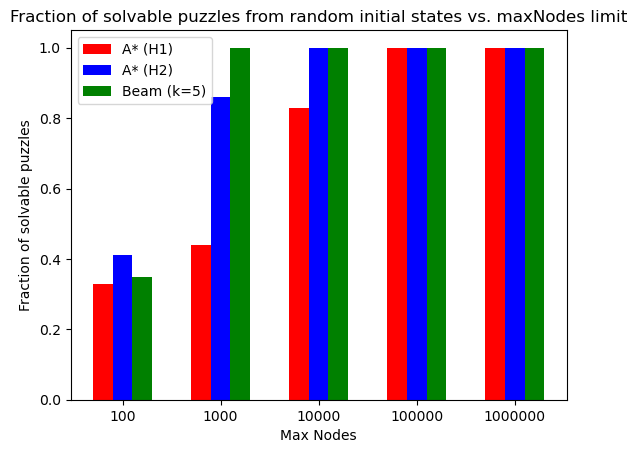

In [4]:
# How does fraction of solvable puzzles from random initial states vary with the maxNodes limit?
    
for key in solvable_solutions.keys():
  for mn in solvable_solutions[key].keys():
    solvable_solutions[key][mn] = round(
        solvable_solutions[key][mn].count(True) / len(solvable_solutions[key][mn]), 2)

x = range(1, 6)
width = 0.2

plt.figure()
plt.bar([i - width for i in x],
        solvable_solutions["h1"].values(), width, color="red")
plt.bar(x, solvable_solutions["h2"].values(), width, color="blue")
plt.bar([i + width for i in x],
        solvable_solutions["beam"].values(), width, color="green")
plt.xticks(x, max_nodes)
plt.xlabel("Max Nodes")
plt.ylabel("Fraction of solvable puzzles")
plt.legend(["A* (H1)", "A* (H2)", "Beam (k=5)"])
plt.title("Fraction of solvable puzzles from random initial states vs. maxNodes limit")

print(solvable_solutions)


Average number of generated nodes for heuristic 1:  15555
Average number of generated nodes for heuristic 2:  1469


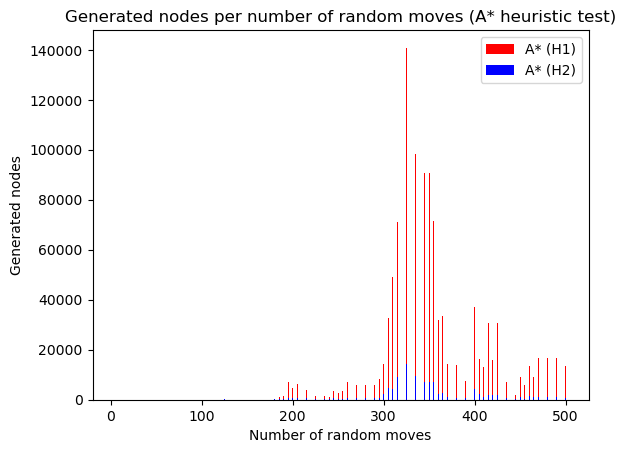

In [5]:
# For A* search, which heuristic is better, i.e., generates lower number of nodes?

plt.figure()
plt.bar(moves, h1_generated, color='r', label="A* (H1)")
plt.bar(moves, h2_generated, color='b', label="A* (H2)")
plt.legend()
plt.xlabel('Number of random moves')
plt.ylabel('Generated nodes')
plt.title('Generated nodes per number of random moves (A* heuristic test)')

print("Average number of generated nodes for heuristic 1: ",
      round(sum(h1_generated) / len(h1_generated)))
print("Average number of generated nodes for heuristic 2: ",
      round(sum(h2_generated) / len(h2_generated)))


Average number of moves for heuristic 1:  16
Average number of moves for heuristic 2:  16
Average number of moves for beam search:  45


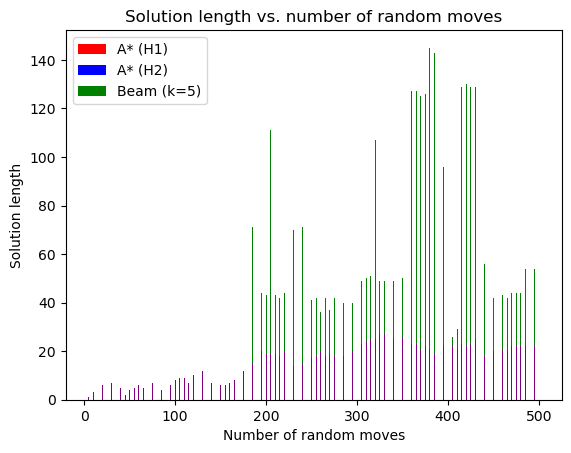

In [6]:
# How does the solution length (number of moves needed to reach the goal state) vary across the three search methods?

plt.figure()
plt.bar(moves, h1_moves, color='r')
plt.bar(moves, h2_moves, color='b')
plt.bar(moves, beam_moves, color='g')
plt.bar(moves, h2_moves, color='purple')
plt.legend(("A* (H1)", "A* (H2)", "Beam (k=5)"))
plt.xlabel("Number of random moves")
plt.ylabel("Solution length")
plt.title("Solution length vs. number of random moves")

print("Average number of moves for heuristic 1: ",
      round(sum(h1_moves) / len(h1_moves)))
print("Average number of moves for heuristic 2: ",
      round(sum(h2_moves) / len(h2_moves)))
print("Average number of moves for beam search: ",
      round(sum(beam_moves) / len(beam_moves)))


Fraction of solvable puzzles for heuristic 1:  0.72
Fraction of solvable puzzles for heuristic 2:  0.85
Fraction of solvable puzzles for beam search:  0.87


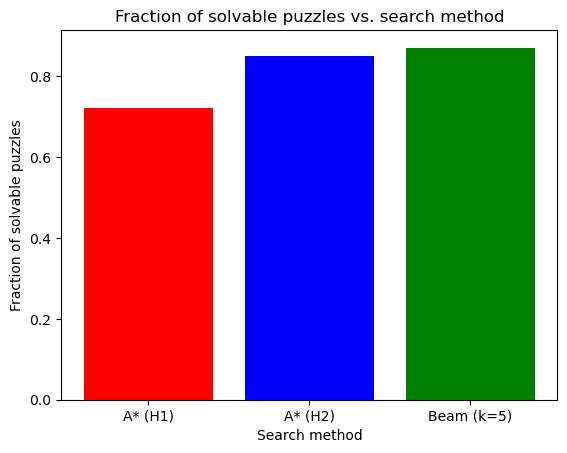

In [7]:
# For each of the three search methods, what fraction of your generated problems were solvable?

h1_solvable = round(sum(solvable_solutions["h1"].values()) / num_max_nodes, 2)
h2_solvable = round(sum(solvable_solutions["h2"].values()) / num_max_nodes, 2)
beam_solvable = round(sum(solvable_solutions["beam"].values()) / num_max_nodes, 2)

plt.figure()
plt.bar([1, 2, 3], [h1_solvable, h2_solvable,
        beam_solvable], color=['r', 'b', 'g'])
plt.xticks([1, 2, 3], ["A* (H1)", "A* (H2)", "Beam (k=5)"])
plt.xlabel("Search method")
plt.ylabel("Fraction of solvable puzzles")
plt.title("Fraction of solvable puzzles vs. search method")

print("Fraction of solvable puzzles for heuristic 1: ", h1_solvable)
print("Fraction of solvable puzzles for heuristic 2: ", h2_solvable)
print("Fraction of solvable puzzles for beam search: ", beam_solvable)